In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.mlab as mlab
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import xlrd
import seaborn as sns

In [2]:
import pandas as pd 
df = pd.read_excel('PCA_finance2.xlsx')
df

,0,1,2,3,4,5,6,7,8
0,4647,119505,221995.0,144086.00,69556.20,1973.00,28000.40,9085.300000,7.046328
1,3129,64606,47928.7,30940.80,31602.50,565.00,18595.40,3629.200000,3.038386
2,11689,181096,74030.7,60451.30,43000.00,1714.50,35964.00,2287.500000,4.767267
3,4099,117599,147074.0,112462.00,67182.00,1587.10,30134.00,6562.800000,5.266808
4,14297,257743,166703.0,134776.00,104007.00,3450.00,85900.90,4312.000000,4.016256
5,17287,358342,227089.0,195000.00,126000.00,4305.00,89900.00,3878.000000,4.788654
6,12581,246108,141027.0,107320.50,90233.30,1844.40,51768.00,3260.000000,3.562819
7,6539,122049,95476.0,44086.80,41899.70,1032.10,32298.28,2639.000000,3.195526
8,1608,20373,15000.0,10096.40,8459.30,164.83,4462.50,1780.021598,3.693669
9,15380,248274,114887.0,91018.70,70873.90,2738.00,72678.20,2737.000000,3.767292


In [34]:
df = pd.read_excel('PCA_finance2.xlsx')
df.index = ['BeiJing',' TianJin','HeBei','ShangHai','JiangSu','GuangDong','ZheJiang','FuJian','HaiNan','ShanDong','HeNan','ShanXi','HuBei','HuNan','AnHui','JiangXi','NeiMengGu','ChongQing','GuiZhou','NingXia','QingHai','YunNan','ShanXi','GanSu','SiChuan','GuangXi','XiZang','XinJiang','Jilin','HeiLongJiang','LiaoNing']
df.columns = ['Banking','Employees','Assets','Deposit','Loan','GDP','IS_income','IS_density','IS_depth']
df.head()

,Banking,Employees,Assets,Deposit,Loan,GDP,IS_income,IS_density,IS_depth
BeiJing,4647,119505,221995.0,144086.0,69556.2,1973.0,28000.4,9085.3,7.046328
TianJin,3129,64606,47928.7,30940.8,31602.5,565.0,18595.4,3629.2,3.038386
HeBei,11689,181096,74030.7,60451.3,43000.0,1714.5,35964.0,2287.5,4.767267
ShangHai,4099,117599,147074.0,112462.0,67182.0,1587.1,30134.0,6562.8,5.266808
JiangSu,14297,257743,166703.0,134776.0,104007.0,3450.0,85900.9,4312.0,4.016256


In [4]:
df.describe()

,Banking,Employees,Assets,Deposit,Loan,GDP,IS_income,IS_density,IS_depth
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,7317.548387,127628.290323,69548.409677,51973.342258,37985.973548,1168.070645,27596.784194,2597.460729,4.137072
std,4409.378670,82359.184861,57698.278806,45084.994420,28968.507374,982.358873,22214.967011,1639.889050,1.043840
min,664.000000,9426.000000,6621.000000,4959.100000,4043.600000,28.000000,1310.600000,830.861000,2.136426
25%,4385.500000,72359.000000,34559.000000,23444.350000,20163.220000,565.000000,15131.200000,1687.200000,3.517969
50%,6539.000000,117599.000000,47368.400000,34853.500000,28417.500000,868.700000,20818.500000,2287.500000,3.966884
75%,9607.000000,157322.000000,85698.250000,60244.450000,42773.400000,1650.800000,35277.300000,2688.000000,4.782862
max,17287.000000,358342.000000,227089.000000,195000.000000,126000.000000,4305.000000,89900.000000,9085.300000,7.046328


In [5]:
df.corr()

,Banking,Employees,Assets,Deposit,Loan,GDP,IS_income,IS_density,IS_depth
Banking,1.000000,0.961268,0.613886,0.683620,0.761877,0.862853,0.885439,0.109754,0.190677
Employees,0.961268,1.000000,0.743796,0.800511,0.859014,0.928620,0.914887,0.288490,0.291543
Assets,0.613886,0.743796,1.000000,0.982301,0.939627,0.876889,0.795572,0.787582,0.445839
Deposit,0.683620,0.800511,0.982301,1.000000,0.968408,0.925950,0.852058,0.709499,0.406717
Loan,0.761877,0.859014,0.939627,0.968408,1.000000,0.945041,0.924503,0.591165,0.274171
GDP,0.862853,0.928620,0.876889,0.925950,0.945041,1.000000,0.962945,0.488806,0.336888
IS_income,0.885439,0.914887,0.795572,0.852058,0.924503,0.962945,1.000000,0.349681,0.117517
IS_density,0.109754,0.288490,0.787582,0.709499,0.591165,0.488806,0.349681,1.000000,0.623674
IS_depth,0.190677,0.291543,0.445839,0.406717,0.274171,0.336888,0.117517,0.623674,1.000000


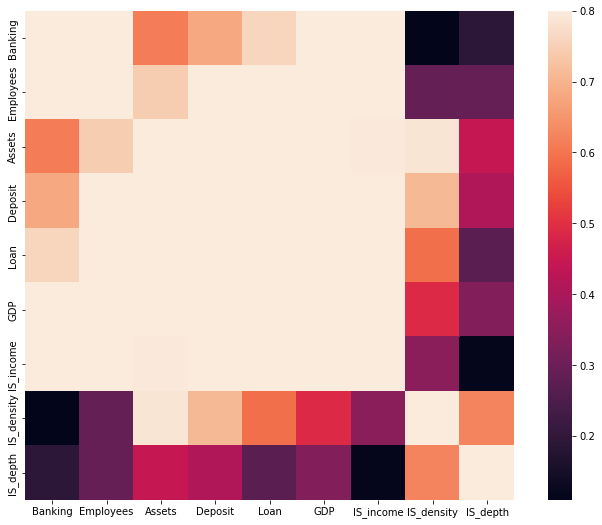

In [6]:
#协方差矩阵
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

<AxesSubplot:ylabel='Frequency'>

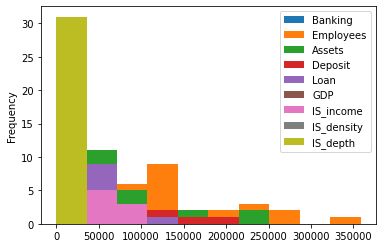

In [7]:
df.plot(kind='hist')

<AxesSubplot:>

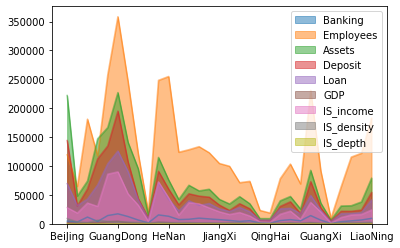

In [8]:
df.plot.area(stacked=False)

In [9]:
import numpy as np 
# 先把df转换numpy中矩阵的形式来进行储存，用data来命名
data = np.mat(df)
data

matrix([[4.64700000e+03, 1.19505000e+05, 2.21995000e+05, 1.44086000e+05,
         6.95562000e+04, 1.97300000e+03, 2.80004000e+04, 9.08530000e+03,
         7.04632791e+00],
        [3.12900000e+03, 6.46060000e+04, 4.79287000e+04, 3.09408000e+04,
         3.16025000e+04, 5.65000000e+02, 1.85954000e+04, 3.62920000e+03,
         3.03838584e+00],
        [1.16890000e+04, 1.81096000e+05, 7.40307000e+04, 6.04513000e+04,
         4.30000000e+04, 1.71450000e+03, 3.59640000e+04, 2.28750000e+03,
         4.76726727e+00],
        [4.09900000e+03, 1.17599000e+05, 1.47074000e+05, 1.12462000e+05,
         6.71820000e+04, 1.58710000e+03, 3.01340000e+04, 6.56280000e+03,
         5.26680826e+00],
        [1.42970000e+04, 2.57743000e+05, 1.66703000e+05, 1.34776000e+05,
         1.04007000e+05, 3.45000000e+03, 8.59009000e+04, 4.31200000e+03,
         4.01625594e+00],
        [1.72870000e+04, 3.58342000e+05, 2.27089000e+05, 1.95000000e+05,
         1.26000000e+05, 4.30500000e+03, 8.99000000e+04, 3.87800000

In [10]:
#2、数据去中心化
#计算每一列数据对应的均值（X_mean）,将每一列的各个数据去中心化 (减去均值)（dataMax）
X_mean = np.mean(data, axis=0)
dataMax = data - X_mean  #将去中心化的数据储存在dataMax中， (shape:31*9)

print(X_mean)
print('--------------------------------')
print(dataMax.shape) 
print('--------------------------------')
print(dataMax) 

[[7.31754839e+03 1.27628290e+05 6.95484097e+04 5.19733423e+04
  3.79859735e+04 1.16807065e+03 2.75967842e+04 2.59746073e+03
  4.13707196e+00]]
--------------------------------
(31, 9)
--------------------------------
[[-2.67054839e+03 -8.12329032e+03  1.52446590e+05  9.21126577e+04
   3.15702265e+04  8.04929355e+02  4.03615806e+02  6.48783927e+03
   2.90925595e+00]
 [-4.18854839e+03 -6.30222903e+04 -2.16197097e+04 -2.10325423e+04
  -6.38347355e+03 -6.03070645e+02 -9.00138419e+03  1.03173927e+03
  -1.09868613e+00]
 [ 4.37145161e+03  5.34677097e+04  4.48229032e+03  8.47795774e+03
   5.01402645e+03  5.46429355e+02  8.36721581e+03 -3.09960729e+02
   6.30195304e-01]
 [-3.21854839e+03 -1.00292903e+04  7.75255903e+04  6.04886577e+04
   2.91960265e+04  4.19029355e+02  2.53721581e+03  3.96533927e+03
   1.12973629e+00]
 [ 6.97945161e+03  1.30114710e+05  9.71545903e+04  8.28026577e+04
   6.60210265e+04  2.28192935e+03  5.83041158e+04  1.71453927e+03
  -1.20816021e-01]
 [ 9.96945161e+03  2.3071371

In [11]:
#3、计算协方差矩阵、特征值和特征向量
# 求出协方差矩阵储存在covMat中。其中一行为一个样本时，covMat=0;当一列为一个样本时，rowvar不为0
covMat = np.cov(dataMax, rowvar=0) 
# 用np.linalg.eig来求解特征值和特征向量
eigVal, eigVect = np.linalg.eig(np.mat(covMat))

print(covMat.shape)
print('--------------------------------')
print(covMat)
print('--------------------------------')
print(eigVal)
print('--------------------------------')
print(eigVect)
print('--------------------------------')

(9, 9)
--------------------------------
[[1.94426203e+07 3.49087336e+08 1.56180861e+08 1.35901502e+08
  9.73168966e+07 3.73752630e+06 8.67325183e+07 7.93616434e+05
  8.77626631e+02]
 [3.49087336e+08 6.78303533e+09 3.53450427e+09 2.97242909e+09
  2.04945612e+09 7.51312040e+07 1.67388384e+09 3.89634896e+07
  2.50638832e+04]
 [1.56180861e+08 3.53450427e+09 3.32909138e+09 2.55528505e+09
  1.57052391e+09 4.97024469e+07 1.01973681e+09 7.45199978e+07
  2.68518777e+04]
 [1.35901502e+08 2.97242909e+09 2.55528505e+09 2.03265672e+09
  1.26478391e+09 4.10099923e+07 8.53388206e+08 5.24563828e+07
  1.91407031e+04]
 [9.73168966e+07 2.04945612e+09 1.57052391e+09 1.26478391e+09
  8.39174419e+08 2.68934632e+07 5.94949753e+08 2.80833598e+07
  8.29051297e+03]
 [3.73752630e+06 7.51312040e+07 4.97024469e+07 4.10099923e+07
  2.68934632e+07 9.65028956e+05 2.10144260e+07 7.87447092e+05
  3.45453740e+02]
 [8.67325183e+07 1.67388384e+09 1.01973681e+09 8.53388206e+08
  5.94949753e+08 2.10144260e+07 4.93504759e+08

In [15]:
eigVal_df = pd.DataFrame(eigVal)
eigVal_df

,0
0,1.194299e+10
1,1.425319e+09
2,8.828741e+07
3,2.767815e+07
4,1.507907e+07
5,8.848738e+05
6,3.131970e+05
7,1.210320e+04
8,1.482158e-01


In [16]:
# 调用sklearn库中的minmaxScaler方法来对特征向量做归一化的处理
from sklearn.preprocessing import MinMaxScaler
minMax = MinMaxScaler()
Norn_eigVect = minMax.fit_transform(eigVect)
Norn_eigVect

array([[0.95097711, 0.52752331, 0.65187253, 0.37460628, 0.30998711,
        0.        , 0.57212853, 0.06017286, 0.00314866],
       [0.        , 1.        , 0.87294412, 0.41248924, 0.39677813,
        0.75132927, 0.96927375, 0.03072186, 0.00341023],
       [0.33194186, 0.        , 1.        , 0.        , 0.38245295,
        0.69187289, 1.        , 0.03857146, 0.00340888],
       [0.45887028, 0.19005009, 0.54221593, 1.        , 0.10599142,
        0.71765215, 0.9500426 , 0.01710694, 0.00343743],
       [0.64462189, 0.37965367, 0.19933026, 0.45229706, 1.        ,
        0.67968735, 0.91417208, 0.05344995, 0.00336906],
       [0.98779211, 0.48821583, 0.66120544, 0.39965088, 0.34862251,
        0.74485538, 0.93167521, 1.        , 0.        ],
       [0.73510009, 0.53464698, 0.        , 0.0537838 , 0.        ,
        0.77539862, 0.96768   , 0.00605165, 0.00355428],
       [0.98907229, 0.46385937, 0.71254782, 0.37937775, 0.37231792,
        1.        , 0.        , 0.        , 0.0028426 ],


In [62]:
Norn_eigVect_df = pd.DataFrame(Norn_eigVect)
Norn_eigVect_df

,0,1,2,3,4,5,6,7,8
0,0.950977,0.527523,0.651873,0.374606,0.309987,0.000000,0.572129,0.060173,0.003149
1,0.000000,1.000000,0.872944,0.412489,0.396778,0.751329,0.969274,0.030722,0.003410
2,0.331942,0.000000,1.000000,0.000000,0.382453,0.691873,1.000000,0.038571,0.003409
3,0.458870,0.190050,0.542216,1.000000,0.105991,0.717652,0.950043,0.017107,0.003437
4,0.644622,0.379654,0.199330,0.452297,1.000000,0.679687,0.914172,0.053450,0.003369
5,0.987792,0.488216,0.661205,0.399651,0.348623,0.744855,0.931675,1.000000,0.000000
6,0.735100,0.534647,0.000000,0.053784,0.000000,0.775399,0.967680,0.006052,0.003554
7,0.989072,0.463859,0.712548,0.379378,0.372318,1.000000,0.000000,0.000000,0.002843
8,1.000000,0.488094,0.673155,0.398418,0.375124,0.713075,0.954627,0.038271,1.000000


In [17]:
#从确定好的方差比例中，找出能解释这么大范围之内所需要用到主成分的个数 99.5%
percentage = 0.995
sortVal = np.sort(eigVal)[-1::-1]
percentSum, componentNum = 0, 0
for i in sortVal:
    percentSum += i
    componentNum += 1
    if percentSum >= sum(sortVal) * percentage:
        break
n = componentNum
n

3

[0.8846289379750826, 0.10557481617350535, 0.006539536913567162, 0.0020501484831328934, 0.0011169216421600843, 6.554349291893721e-05, 2.319881268824425e-05, 8.964959663271815e-07, 1.097849021326364e-11]


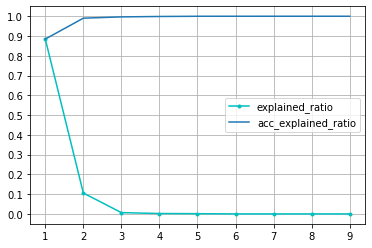

In [60]:
id = np.linspace(1, dataMax.shape[1], dataMax.shape[1])
explained_ratio = []
acc_explained_ratio = []
for i in np.argsort(-eigVal):
    explained_ratio.append(eigVal[i] / sum(eigVal))
    acc_explained_ratio.append(sum(eigVal[:i+1])/sum(eigVal))                          
plt.plot(id, explained_ratio, 'c.-', label='explained_ratio')
plt.plot(id, acc_explained_ratio, label='acc_explained_ratio')
plt.legend()
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid()



In [71]:
for idx, val in enumerate(explained_ratio, 1):
    print("Principle component %d: %.2f%%" % (idx, val * 100))
print("total: %.2f%%" % np.sum(explained_ratio* 100)) #方差解释率

for idx, val in enumerate(acc_explained_ratio, 1):
    print("Principle component %d: %.2f%%" % (idx, val * 100))


Principle component 1: 88.46%
Principle component 2: 10.56%
Principle component 3: 0.65%
Principle component 4: 0.21%
Principle component 5: 0.11%
Principle component 6: 0.01%
Principle component 7: 0.00%
Principle component 8: 0.00%
Principle component 9: 0.00%
total: 100.00%
Principle component 1: 88.46%
Principle component 2: 99.02%
Principle component 3: 99.67%
Principle component 4: 99.88%
Principle component 5: 99.99%
Principle component 6: 100.00%
Principle component 7: 100.00%
Principle component 8: 100.00%
Principle component 9: 100.00%


In [18]:
#通过前面确定好的主成分个数，确定好主成分的特征向量
eigValInd = np.argsort(eigVal)
eigValInd = eigValInd[-1:-(n + 1):-1]
n_eigVect = Norn_eigVect[:,eigValInd]
n_eigVect

array([[0.95097711, 0.52752331, 0.65187253],
       [0.        , 1.        , 0.87294412],
       [0.33194186, 0.        , 1.        ],
       [0.45887028, 0.19005009, 0.54221593],
       [0.64462189, 0.37965367, 0.19933026],
       [0.98779211, 0.48821583, 0.66120544],
       [0.73510009, 0.53464698, 0.        ],
       [0.98907229, 0.46385937, 0.71254782],
       [1.        , 0.48809376, 0.67315489]])

In [19]:
n_eigVect.shape
n_eigVect_df = pd.DataFrame(n_eigVect)
n_eigVect_df

,0,1,2
0,0.950977,0.527523,0.651873
1,0.000000,1.000000,0.872944
2,0.331942,0.000000,1.000000
3,0.458870,0.190050,0.542216
4,0.644622,0.379654,0.199330
5,0.987792,0.488216,0.661205
6,0.735100,0.534647,0.000000
7,0.989072,0.463859,0.712548
8,1.000000,0.488094,0.673155


In [20]:
# 使用这些特征向量，找到每一个样本在低维空间上的映射
low_dataMat = dataMax * n_eigVect
low_dataMat

matrix([[ 118194.04697502,   23579.34118762,  205009.48423508],
        [ -31119.09639197,  -76281.53892221,  -91705.97569686],
        [  19152.00058351,   63885.39407462,   59743.43777934],
        [  75452.22642157,   14254.10695142,  108393.38116759],
        [ 166250.36690186,  207679.75096621,  276074.51642304],
        [ 234306.41877476,  332005.93914732,  463521.80839287],
        [ 106900.15504266,  165171.23214887,  219679.33665492],
        [  10131.94781646,   -3536.9038858 ,   16992.6429614 ],
        [ -80592.13216828, -142673.70351557, -181736.19842849],
        [  96661.77582234,  169739.09021405,  184775.04328695],
        [  27389.89983518,  143095.72013381,  126800.98123304],
        [ -37838.94891108,  -20361.36352524,  -44774.21726107],
        [   7347.54157444,    6420.89795177,   -1577.85768796],
        [  -3360.73999191,    7468.23043115,   -9856.14423481],
        [  -7561.8031556 ,   -6648.40148865,  -17333.24006887],
        [ -32267.95207883,  -35831.64996

In [74]:
print(low_dataMat.shape)
low_dataMat_df = pd.DataFrame(low_dataMat)
low_dataMat_df

(31, 3)


,0,1,2
0,118194.046975,23579.341188,205009.484235
1,-31119.096392,-76281.538922,-91705.975697
2,19152.000584,63885.394075,59743.437779
3,75452.226422,14254.106951,108393.381168
4,166250.366902,207679.750966,276074.516423
5,234306.418775,332005.939147,463521.808393
6,106900.155043,165171.232149,219679.336655
7,10131.947816,-3536.903886,16992.642961
8,-80592.132168,-142673.703516,-181736.198428
9,96661.775822,169739.090214,184775.043287


In [75]:
#计算每一个主成分贡献率情况
explained_ratio = []
for i in eigValInd:
    explained_ratio.append(eigVal[i] / sum(eigVal))
explained_ratio

[0.8846289379750826, 0.10557481617350535, 0.006539536913567162]

In [76]:
sum(explained_ratio)

0.9967432910621551

[0.8875193301099619, 0.1059197660222043, 0.006560903867833878]

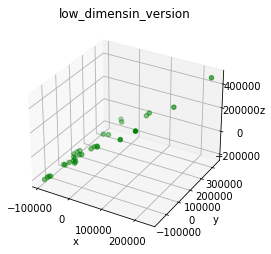

In [78]:
#----------------------------------
x = low_dataMat[:,0]
y = low_dataMat[:,1]
z = low_dataMat[:,2]


import matplotlib.pyplot as plt 
import mpl_toolkits.mplot3d

ax = plt.subplot(projection = '3d')
ax.set_title('low_dimensin_version')
ax.scatter(x, y, z, c = 'g')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

In [82]:
#计算权重
weight=[]
for i in range(n):
    weight.append(explained_ratio[i] / sum(explained_ratio)  )
weight

#存储最终结果
Score=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
Province=[["北京"],["天津"],["河北"],["上海"],["江苏"],["广东"],["浙江"],["福建"],["海南"],["山东"],["河南"],["山西"],["湖北"],["湖南"],["安徽"],["江西"],["内蒙古"],["重庆"],["贵州"],["宁夏"],["青海"],["云南"],["陕西"],["甘肃"],["四川"],["广西"],["西藏"],["新疆"],["吉林"],["黑龙江"],["辽宁"]]
score=0 #储存每个省份得分总和

dataMaxList=dataMax.tolist()
for j in range(31):
    for z in range(9):
        #根据主成分提取的解释程度,计算得分
        score+=(dataMaxList[j][z]*n_eigVect[z][0]*weight[0]+dataMaxList[j][z]*n_eigVect[z][1]*weight[1]+dataMaxList[j][z]*n_eigVect[z][2]*weight[2])
    Score[j].append(score)
    score=0

for i in range(31):
    Score[i].append(Province[i])

#排序
Score.sort(reverse=True)
for i in range(31):
    print("Rank: ",i+1,Score[i])


Rank:  1 [246158.58924941183, ['广东']]
Rank:  2 [171359.10325577867, ['江苏']]
Rank:  3 [113812.14726446419, ['浙江']]
Rank:  4 [108742.06721386447, ['北京']]
Rank:  5 [104980.21054156007, ['山东']]
Rank:  6 [69186.25967587752, ['上海']]
Rank:  7 [47848.976955729806, ['四川']]
Rank:  8 [40297.659797063, ['河南']]
Rank:  9 [24156.467672770075, ['河北']]
Rank:  10 [11599.24283872058, ['辽宁']]
Rank:  11 [8729.158603675127, ['福建']]
Rank:  12 [7190.833012198613, ['湖北']]
Rank:  13 [-2256.353701255913, ['湖南']]
Rank:  14 [-7529.165322987936, ['安徽']]
Rank:  15 [-26834.21233152124, ['陕西']]
Rank:  16 [-32836.8721498246, ['江西']]
Rank:  17 [-35511.41126812492, ['重庆']]
Rank:  18 [-36033.22878531775, ['山西']]
Rank:  19 [-36300.19642853666, ['天津']]
Rank:  20 [-41645.870938165, ['广西']]
Rank:  21 [-42417.769457441296, ['云南']]
Rank:  22 [-42739.19787679127, ['黑龙江']]
Rank:  23 [-46605.34565941506, ['内蒙古']]
Rank:  24 [-49632.441678378775, ['吉林']]
Rank:  25 [-52054.467122413334, ['贵州']]
Rank:  26 [-60509.42387893001, ['新疆']]
